In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# 1. Exploratory Data Analysis

In [2]:
train = pd.read_csv('train.csv', sep=',')
#test = pd.read_csv('test.csv',sep=',')

In [3]:
print("size of the data:",train.shape)


size of the data: (37670293, 24)


In [4]:
train.head(n=7)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
5,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,...,0,1,14984,1,0,1,2,50,1457,92
6,2014-07-16 09:42:23,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,2,2,50,675,41


In [5]:
# converting date_time to type (datetime) instead of string 
#train['date_time']=pd.to_datetime(train['date_time'],infer_datetime_format=True)
#train['srch_ci']=pd.to_datetime(train['srch_ci'],infer_datetime_format=True)
#train['srch_co']=pd.to_datetime(train['srch_co'],infer_datetime_format=True)

#train.dtypes

In [6]:
train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [7]:
hotel_cluster = train['hotel_cluster'].unique()
np.sort(hotel_cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
train['hotel_cluster'].describe()

count    3.767029e+07
mean     4.980861e+01
std      2.891595e+01
min      0.000000e+00
25%      2.500000e+01
50%      4.900000e+01
75%      7.300000e+01
max      9.900000e+01
Name: hotel_cluster, dtype: float64

In [9]:
for columns in train:
    print ('Column Name: ',columns)
    print (train[columns].unique())

Column Name:  date_time
['2014-08-11 07:46:59' '2014-08-11 08:22:12' '2014-08-11 08:24:33' ...,
 '2014-02-09 15:59:16' '2014-09-08 14:52:52' '2014-09-18 08:49:33']
Column Name:  site_name
[ 2 30 37 24 25 13 11 33 17 10 34 26 23  8 28 47 22 35 44 27  9 32 21 29  7
 14 18 40 15 31 19 16 36 45 46 53  6 20 38 48 41 43  3  5  4]
Column Name:  posa_continent
[3 4 1 2 0]
Column Name:  user_location_country
[ 66 195  69   3  55  23  46 205 194 133 182  68 215 103 134   1  77 202
 239  80 198  85  93  28   0  70 119  12 148 167  75 154 231 173 141  71
  24   6 190 209  51  49 157 162 158   5 235  63 143  54  32  62  29 168
  52 130 214  39  50 225  27  48 179  64 221  91 206  82 229 191  59 219
 101  19 230 142 115 166 208 111 217  57  47 109  26 181 218 176 174  34
 233 105 108  92 144 192  16 114 118 104 163  74 184 150 178 129 125 131
 117   4  58 156  30  31  65 149 126  67 152 228 197 123  43  83  45  13
  95  15  44 139  10  60 146 124  76  73 137 238  99 188 224 223 155  72
  87 122 222 

### Managing the Missing Data 

In [10]:
# Number of missing data 
train.isnull().sum(axis=0)

date_time                           0
site_name                           0
posa_continent                      0
user_location_country               0
user_location_region                0
user_location_city                  0
orig_destination_distance    13525001
user_id                             0
is_mobile                           0
is_package                          0
channel                             0
srch_ci                         47083
srch_co                         47084
srch_adults_cnt                     0
srch_children_cnt                   0
srch_rm_cnt                         0
srch_destination_id                 0
srch_destination_type_id            0
is_booking                          0
cnt                                 0
hotel_continent                     0
hotel_country                       0
hotel_market                        0
hotel_cluster                       0
dtype: int64

In [11]:
train_2 = train.dropna()
print ("size of the data without the missing data:", train_2.shape)

size of the data without the missing data: (24117894, 24)


### Converting Check In date, and Check Out date

In [12]:
train_2.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [13]:
train_2.head(n=8)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
5,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,...,0,1,14984,1,0,1,2,50,1457,92
12,2014-01-17 06:24:56,2,3,66,318,22418,420.6642,756,0,1,...,0,1,8291,1,0,5,2,50,191,18
14,2014-01-21 06:39:08,2,3,66,318,22418,421.8551,756,0,1,...,0,1,8291,1,0,1,2,50,191,25


In [14]:
train_2['ci_year']=train_2['srch_ci'].apply(lambda x: x[:4]).astype(int)
train_2['co_year']=train_2['srch_co'].apply(lambda x: x[:4]).astype(int)

/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
train2=train_2[train_2['ci_year']<2020]
train2['co_year'].unique()

array([2014, 2015, 2013, 2016, 2019])

In [16]:
train2['ci_year'].unique()

array([2014, 2015, 2013, 2016, 2012, 2018])

In [17]:
train2['srch_ci']=pd.to_datetime(train2['srch_ci'],infer_datetime_format=True)
train2['srch_co']=pd.to_datetime(train2['srch_co'],infer_datetime_format=True)

/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
train2['stay']= train2['srch_co']- train2['srch_ci']

/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
train2['stay']=train2['stay'].apply(lambda x: x.days)

/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
train3 = train2.drop(['date_time','srch_ci','srch_co'],axis=1)
train3.dtypes

site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
ci_year                        int64
co_year                        int64
stay                           int64
dtype: object

# 2. Splitting the data into Training data and Testing data 

In [21]:
from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(train3, test_size=0.5)

In [22]:
train_split.shape

(12058946, 24)

In [23]:
#train.to_csv('train.csv',sep=',')
#test.to_csv('test.csv',sep=',')

# 3. Unsupervised K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

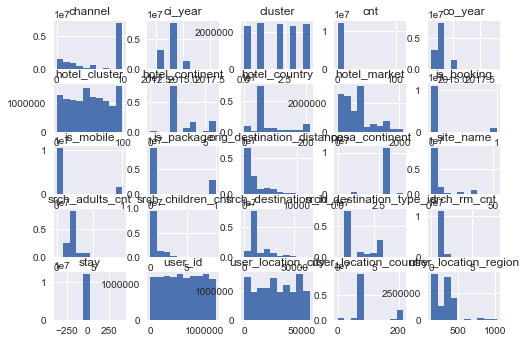

In [50]:
# Histogram 
train_split.hist()

In [25]:
mat = train_split.as_matrix()

In [26]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(mat)
kmeans.labels_

array([1, 2, 2, ..., 0, 4, 2], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[  6.07086744e+00,   2.90128826e+00,   8.78781095e+01,
          3.09449887e+02,   2.81116491e+04,   1.95534605e+03,
          1.18255120e+05,   1.38257795e-01,   2.46719651e-01,
          5.99305178e+00,   2.04105578e+00,   3.48708766e-01,
          1.10477146e+00,   1.43627904e+04,   2.62022862e+00,
          8.20601443e-02,   1.47571522e+00,   2.89439528e+00,
          7.38272119e+01,   6.19844759e+02,   4.99057125e+01,
          2.01384865e+03,   2.01387098e+03,   3.27455928e+00],
       [  6.49415064e+00,   2.88733371e+00,   8.49960390e+01,
          3.24579745e+02,   2.79864485e+04,   2.08481328e+03,
          1.06805621e+06,   1.34252850e-01,   2.39364401e-01,
          6.01753508e+00,   2.03538011e+00,   3.51543325e-01,
          1.10423253e+00,   1.44635901e+04,   2.63967692e+00,
          8.32378563e-02,   1.47323325e+00,   2.93922132e+00,
          7.49053898e+01,   6.20395421e+02,   4.99892295e+01,
          2.01383394e+03,   2.01385619e+03,   3.29300243e+00],
      

In [28]:
train_split['cluster']=kmeans.labels_.tolist()

/Users/soohyunlee/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
train_split['cluster'].head()

9633846     1
6687026     2
25606567    2
5286668     3
21179715    0
Name: cluster, dtype: int64

# 4. PCA 

In [31]:
from sklearn.decomposition import PCA

In [35]:
train_split['cluster'].unique()

array([1, 2, 3, 0, 4])

In [39]:
train_c = train_split.groupby('cluster')
train_c.describe()
# train_c is the dataframe grouped by cluster 

channel       ci_year           cnt       co_year  \
cluster                                                                 
0       count  2.352564e+06  2.352564e+06  2.352564e+06  2.352564e+06   
        mean   5.992929e+00  2.013849e+03  1.475758e+00  2.013871e+03   
        std    3.731434e+00  5.901938e-01  1.190961e+00  6.048920e-01   
        min    0.000000e+00  2.012000e+03  1.000000e+00  2.013000e+03   
        25%    2.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        50%    9.000000e+00  2.014000e+03  1.000000e+00  2.014000e+03   
        75%    9.000000e+00  2.014000e+03  2.000000e+00  2.014000e+03   
        max    1.000000e+01  2.016000e+03  8.600000e+01  2.016000e+03   
1       count  2.497268e+06  2.497268e+06  2.497268e+06  2.497268e+06   
        mean   6.017531e+00  2.013834e+03  1.473226e+00  2.013856e+03   
        std    3.720571e+00  5.944867e-01  1.184090e+00  6.094689e-01   
        min    0.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        25%    2.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        50%    9.000000e+00  2.014000e+03  1.000000e+00  2.014000e+03   
        75%    9.000000e+00  2.014000e+03  2.000000e+00  2.014000e+03   
        max    1.000000e+01  2.018000e+03  6.900000e+01  2.019000e+03   
2       count  2.422996e+06  2.422996e+06  2.422996e+06  2.422996e+06   
        mean   6.036266e+00  2.013845e+03  1.474854e+00  2.013867e+03   
        std    3.726643e+00  5.910113e-01  1.184988e+00  6.062675e-01   
        min    0.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        25%    2.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        50%    9.000000e+00  2.014000e+03  1.000000e+00  2.014000e+03   
        75%    9.000000e+00  2.014000e+03  2.000000e+00  2.014000e+03   
        max    1.000000e+01  2.016000e+03  6.300000e+01  2.016000e+03   
3       count  2.360250e+06  2.360250e+06  2.360250e+06  2.360250e+06   
        mean   5.959181e+00  2.013858e+03  1.474876e+00  2.013881e+03   
        std    3.736405e+00  5.880393e-01  1.196529e+00  6.031693e-01   
        min    0.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        25%    2.000000e+00  2.013000e+03  1.000000e+00  2.014000e+03   
        50%    9.000000e+00  2.014000e+03  1.000000e+00  2.014000e+03   
        75%    9.000000e+00  2.014000e+03  2.000000e+00  2.014000e+03   
        max    1.000000e+01  2.016000e+03  7.700000e+01  2.016000e+03   
4       count  2.425868e+06  2.425868e+06  2.425868e+06  2.425868e+06   
        mean   6.016338e+00  2.013848e+03  1.476702e+00  2.013870e+03   
        std    3.728650e+00  5.880913e-01  1.194894e+00  6.033481e-01   
        min    0.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        25%    2.000000e+00  2.013000e+03  1.000000e+00  2.013000e+03   
        50%    9.000000e+00  2.014000e+03  1.000000e+00  2.014000e+03   
        75%    9.000000e+00  2.014000e+03  2.000000e+00  2.014000e+03   
        max    1.000000e+01  2.016000e+03  1.130000e+02  2.016000e+03   

               hotel_cluster  hotel_continent  hotel_country  hotel_market  \
cluster                                                                      
0       count   2.352564e+06     2.352564e+06   2.352564e+06  2.352564e+06   
        mean    4.990602e+01     2.894493e+00   7.382741e+01  6.198522e+02   
        std     2.915181e+01     1.491023e+00   5.358535e+01  4.748398e+02   
        min     0.000000e+00     0.000000e+00   0.000000e+00  0.000000e+00   
        25%     2.500000e+01     2.000000e+00   5.000000e+01  2.450000e+02   
        50%     4.900000e+01     2.000000e+00   5.000000e+01  6.280000e+02   
        75%     7.300000e+01     4.000000e+00   7.700000e+01  7.010000e+02   
        max     9.900000e+01     6.000000e+00   2.120000e+02  2.117000e+03   
1       count   2.497268e+06     2.497268e+06   2.497268e+06  2.497268e+06   
        mean    4.998962e+01     2.939186e+00   7.490424e+01  6.203995e+02   
        std     2

In [79]:
# Converting to CSV file 
cluster0 = train_split[train_split['cluster']==0]
cluster1 = train_split[train_split['cluster']==1]
cluster2 = train_split[train_split['cluster']==2]
cluster3 = train_split[train_split['cluster']==3]
cluster4 = train_split[train_split['cluster']==4]

cluster0.to_csv('cluster0.csv',sep=',')
cluster1.to_csv('cluster1.csv',sep=',')
cluster2.to_csv('cluster2.csv',sep=',')
cluster3.to_csv('cluster3.csv',sep=',')
cluster4.to_csv('cluster4.csv',sep=',')

Cluster Number: 0
% of varaince explained: [  9.14193180e-01   5.95336938e-02   2.51594902e-02   1.05992040e-03
   4.81647277e-05]


Cluster Number: 1
% of varaince explained: [  9.23127266e-01   5.30796414e-02   2.26606867e-02   1.08211528e-03
   4.42304309e-05]


Cluster Number: 2
% of varaince explained: [  9.18769681e-01   5.63443092e-02   2.38382231e-02   9.96993726e-04
   4.55759134e-05]


Cluster Number: 3
% of varaince explained: [  9.16105130e-01   5.81752655e-02   2.46336185e-02   1.03352349e-03
   4.69604637e-05]


Cluster Number: 4
% of varaince explained: [  9.20676776e-01   5.48548892e-02   2.34741908e-02   9.45241954e-04
   4.39404352e-05]




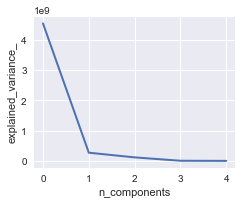

In [45]:
pca = PCA(n_components=5) # DEFINE: n_components
for key, values in train_c:
    print ("Cluster Number:",key)
    pca.fit(values)
    print('% of varaince explained:',pca.explained_variance_ratio_) 
    print ('\n')
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.axes([.2, .2, .7, .7])
    plt.plot(pca.explained_variance_, linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_') # PCA spectrum

In [47]:
# newly tranformed PCA 
pca = PCA(n_components=5) # DEFINE: n_components
for key, values in train_c:
    print ("Cluster Number:",key)
    pca.fit(values)
    T = pca.transform(values)
    print (T.shape)

Cluster Number: 0
(2352564, 5)
Cluster Number: 1
(2497268, 5)
Cluster Number: 2
(2422996, 5)
Cluster Number: 3
(2360250, 5)
Cluster Number: 4
(2425868, 5)


# 5. Logistic Regression 

In [71]:
import statsmodels.api as sm

In [57]:
train_split.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'ci_year', 'co_year', 'stay', 'cluster'],
      dtype='object')

In [73]:
for key, values in train_c:
    print ("Cluster Number:",key)
    train_col = values.ix[:, values.columns != 'is_booking']
    model = sm.GLM(values['is_booking'],values[train_col.columns],family=sm.families.Binomial())
    result = model.fit()
    print(result.summary())

Cluster Number: 0


/Users/soohyunlee/anaconda/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return scale * np.sum(endog * np.log(mu/(1 - mu) + 1e-200) +
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:905: RuntimeWarning: invalid value encountered in multiply
  return scale * np.sum(endog * np.log(mu/(1 - mu) + 1e-200) +
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:906: RuntimeWarning: divide by zero encountered in log
  np.log(1 - mu))
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/soohyunlee/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/soohyunlee/anaconda/lib/python3

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_booking   No. Observations:              2352564
Model:                            GLM   Df Residuals:                  2352541
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 02 May 2017   Deviance:                   1.1952e+06
Time:                        14:57:56   Pearson chi2:                 4.30e+16
No. Iterations:                    12                                         
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
site_name                     0.0006      0.000      1.547      0.122        -0.000     0.001
posa_co